Now I'm trying to play with pokemon dataset, and see what I can do with it..

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.models import *
from keras.layers import *
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import LabelEncoder

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pokemon/Pokemon.csv


In [3]:
df = pd.read_csv("/kaggle/input/pokemon/Pokemon.csv")

In [4]:
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


let's inspect the data first, Let's see the Type distribution

[Text(0, 0, 'Grass'),
 Text(0, 0, 'Fire'),
 Text(0, 0, 'Water'),
 Text(0, 0, 'Bug'),
 Text(0, 0, 'Normal'),
 Text(0, 0, 'Poison'),
 Text(0, 0, 'Electric'),
 Text(0, 0, 'Ground'),
 Text(0, 0, 'Fairy'),
 Text(0, 0, 'Fighting'),
 Text(0, 0, 'Psychic'),
 Text(0, 0, 'Rock'),
 Text(0, 0, 'Ghost'),
 Text(0, 0, 'Ice'),
 Text(0, 0, 'Dragon'),
 Text(0, 0, 'Dark'),
 Text(0, 0, 'Steel'),
 Text(0, 0, 'Flying')]

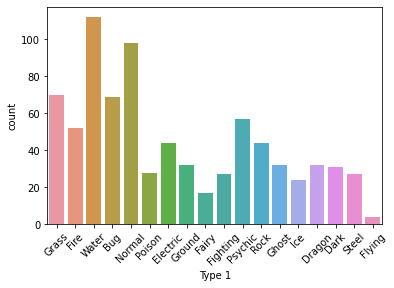

In [5]:
ax = sns.countplot(df["Type 1"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

[Text(0, 0, 'Poison'),
 Text(0, 0, 'Flying'),
 Text(0, 0, 'Dragon'),
 Text(0, 0, 'Ground'),
 Text(0, 0, 'Fairy'),
 Text(0, 0, 'Grass'),
 Text(0, 0, 'Fighting'),
 Text(0, 0, 'Psychic'),
 Text(0, 0, 'Steel'),
 Text(0, 0, 'Ice'),
 Text(0, 0, 'Rock'),
 Text(0, 0, 'Dark'),
 Text(0, 0, 'Water'),
 Text(0, 0, 'Electric'),
 Text(0, 0, 'Fire'),
 Text(0, 0, 'Ghost'),
 Text(0, 0, 'Bug'),
 Text(0, 0, 'Normal')]

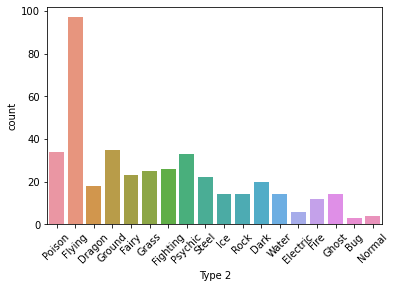

In [6]:
ax = sns.countplot(df["Type 2"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

Now, I'm gonna convert string features to integer

In [7]:
type1list = list(set(df["Type 1"]))
type1 = df["Type 1"]
type1 = [type1list.index(x) for x in type1]
df["Type 1"] = type1
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,3,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,3,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,3,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,3,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,15,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,12,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,12,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,1,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,1,Dark,680,80,160,60,170,130,80,6,True


In [8]:
type2list = list(set(df["Type 2"]))
type2 = df["Type 2"]
type2 = [type2list.index(x) for x in type2]
df["Type 2"] = type2
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,3,13,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,3,13,405,60,62,63,80,80,60,1,False
2,3,Venusaur,3,13,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,3,13,625,80,100,123,122,120,80,1,False
4,4,Charmander,15,0,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,12,18,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,12,18,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,1,3,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,1,7,680,80,160,60,170,130,80,6,True


In [9]:
Legendary = df["Legendary"]
Legendary = [int(x==True) for x in Legendary]
df["Legendary"] = Legendary
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,3,13,318,45,49,49,65,65,45,1,0
1,2,Ivysaur,3,13,405,60,62,63,80,80,60,1,0
2,3,Venusaur,3,13,525,80,82,83,100,100,80,1,0
3,3,VenusaurMega Venusaur,3,13,625,80,100,123,122,120,80,1,0
4,4,Charmander,15,0,309,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,12,18,600,50,100,150,100,150,50,6,1
796,719,DiancieMega Diancie,12,18,700,50,160,110,160,110,110,6,1
797,720,HoopaHoopa Confined,1,3,600,80,110,60,150,130,70,6,1
798,720,HoopaHoopa Unbound,1,7,680,80,160,60,170,130,80,6,1


In [10]:
# df = df.drop(, axis=1)

In [11]:
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,3,13,318,45,49,49,65,65,45,1,0
1,2,Ivysaur,3,13,405,60,62,63,80,80,60,1,0
2,3,Venusaur,3,13,525,80,82,83,100,100,80,1,0
3,3,VenusaurMega Venusaur,3,13,625,80,100,123,122,120,80,1,0
4,4,Charmander,15,0,309,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,12,18,600,50,100,150,100,150,50,6,1
796,719,DiancieMega Diancie,12,18,700,50,160,110,160,110,110,6,1
797,720,HoopaHoopa Confined,1,3,600,80,110,60,150,130,70,6,1
798,720,HoopaHoopa Unbound,1,7,680,80,160,60,170,130,80,6,1


Now, I'll see the correlation between features

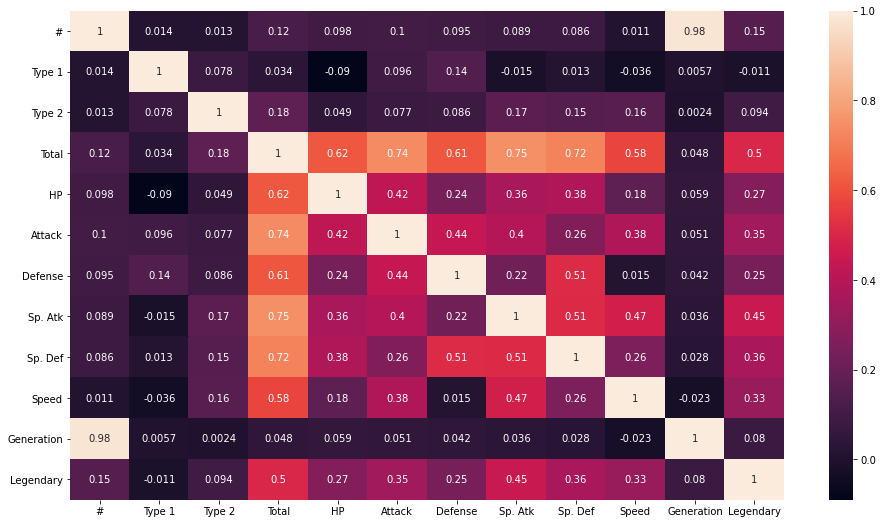

In [12]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(), annot = True)

It seems that the Legendary feature have big correlation with the other features, so I'll try to predict whether a pokemon is Legendary or not
The "Total" column has highest correlation with "Legendary", so let's plot it with the other status, and see what we can do 

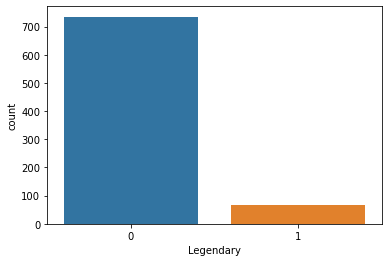

In [141]:
sns.countplot(df["Legendary"])

In [24]:
status = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]

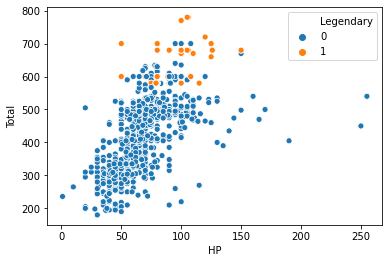

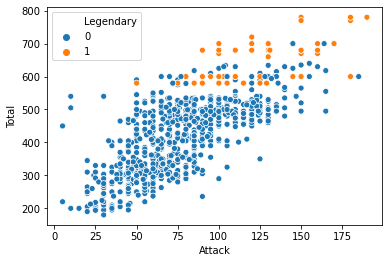

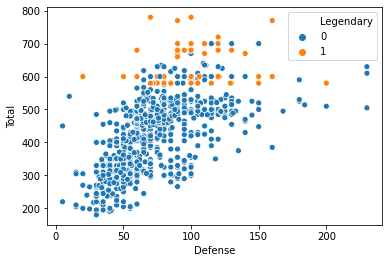

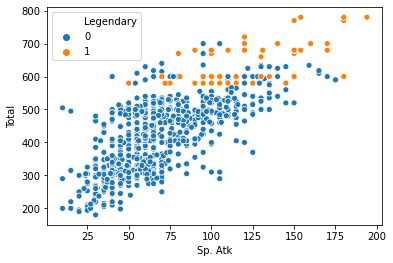

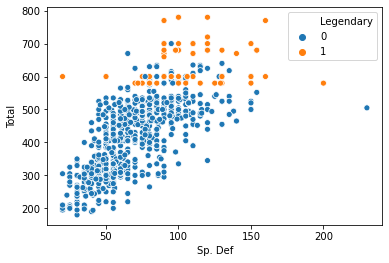

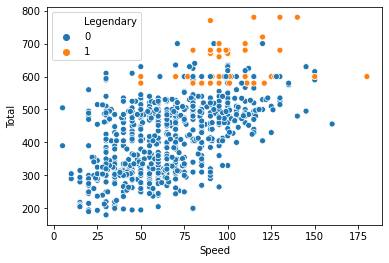

In [19]:
for col in status:
    sns.scatterplot(x=col, y = "Total", data = df, hue = "Legendary")
    plt.show()

From the visualization above, we can see that Legendary Pokemons are have relatively high total stats, but the stats are spreading randomly, also the ration between legendary and non-legendary pokemon is unbalanced.

So my idea to classifies the Legendary pokemon is:
* Grab the lowest Total value of Legendary Pokemon --> **min**
* Drop all of the pokemon that have lower value than **min**
* Train the model by only using the filtered dataset
* For the prediction, predict all of the pokemon with lower Total value as non-legendary


Let's find the lowest Total stats value that belong to legendary pokemon

In [46]:
df2 = df[df["Legendary"] == 1]
df2

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
156,144,Articuno,13,10,580,90,85,100,95,125,85,1,1
157,145,Zapdos,11,10,580,90,90,85,125,90,100,1,1
158,146,Moltres,15,10,580,90,100,90,125,85,90,1,1
162,150,Mewtwo,1,0,680,106,110,90,154,90,130,1,1
163,150,MewtwoMega Mewtwo X,1,17,780,106,190,100,154,100,130,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,12,18,600,50,100,150,100,150,50,6,1
796,719,DiancieMega Diancie,12,18,700,50,160,110,160,110,110,6,1
797,720,HoopaHoopa Confined,1,3,600,80,110,60,150,130,70,6,1
798,720,HoopaHoopa Unbound,1,7,680,80,160,60,170,130,80,6,1


In [49]:
min_total = df2["Total"].min()

Drop all pokemon with lower Total value

In [51]:
new_df = df[df["Total"] >= min_total]
new_df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
3,3,VenusaurMega Venusaur,3,13,625,80,100,123,122,120,80,1,0
7,6,CharizardMega Charizard X,15,9,634,78,130,111,130,85,100,1,0
8,6,CharizardMega Charizard Y,15,10,634,78,104,78,159,115,100,1,0
12,9,BlastoiseMega Blastoise,10,0,630,79,103,120,135,115,78,1,0
71,65,AlakazamMega Alakazam,1,0,590,55,50,65,175,95,150,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,12,18,600,50,100,150,100,150,50,6,1
796,719,DiancieMega Diancie,12,18,700,50,160,110,160,110,110,6,1
797,720,HoopaHoopa Confined,1,3,600,80,110,60,150,130,70,6,1
798,720,HoopaHoopa Unbound,1,7,680,80,160,60,170,130,80,6,1


I'll drop the # and name features, and use "Legendary" feature as the label

In [52]:
X = new_df.drop(["Name", "Legendary", "#"], axis=1)
Y = new_df["Legendary"]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)

In [55]:
X_train

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
552,4,0,720,120,120,120,120,120,120,4
163,1,17,780,106,190,100,154,100,130,1
157,11,10,580,90,90,85,125,90,100,1
423,2,0,670,100,150,140,100,90,90,3
137,17,10,600,65,155,120,65,90,105,1
...,...,...,...,...,...,...,...,...,...,...
7,15,9,634,78,130,111,130,85,100,1
700,12,17,580,91,129,90,72,90,108,5
269,1,10,680,106,90,130,90,154,110,2
553,1,12,600,100,100,100,100,100,100,5


For this time, i'm using f1-score

In [56]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

gamma = 2.0
epsilon = K.epsilon()
def focal_loss(y_true, y_pred):
    pt = y_pred * y_true + (1-y_pred) * (1-y_true)
    pt = K.clip(pt, epsilon, 1-epsilon)
    CE = -K.log(pt)
    FL = K.pow(1-pt, gamma) * CE
    loss = K.sum(FL, axis=1)
    return loss

I'll predict using neural network

In [81]:
model = Sequential()

model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(optimizer = Adam(1e-4),
             loss = "binary_crossentropy",
             metrics = ["accuracy", f1_m]
)

In [82]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
early_stop = EarlyStopping(patience=100, verbose=1, monitor='f1_m', mode='max')
# checkpoint = ModelCheckpoint(os.path.join(model_save_path, model.name+".h5"), save_weights_only=True,
#                              verbose=1, save_best_only=True, monitor='f1_m', mode='max')

In [83]:
history = model.fit(
        X_train,
        y_train,
        epochs = 5000,
        callbacks=[early_stop],
        verbose = 1
    
)

Epoch 1/5000
3/3 [==============================] - 0s 2ms/step - loss: 25.2695 - accuracy: 0.5595 - f1_m: 0.7192
Epoch 2/5000
3/3 [==============================] - 0s 2ms/step - loss: 21.8553 - accuracy: 0.5595 - f1_m: 0.7213
Epoch 3/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.3023 - accuracy: 0.5595 - f1_m: 0.6854
Epoch 4/5000
3/3 [==============================] - 0s 2ms/step - loss: 15.0313 - accuracy: 0.5595 - f1_m: 0.7033
Epoch 5/5000
3/3 [==============================] - 0s 2ms/step - loss: 11.6532 - accuracy: 0.5595 - f1_m: 0.7135
Epoch 6/5000
3/3 [==============================] - 0s 2ms/step - loss: 8.3728 - accuracy: 0.5595 - f1_m: 0.7099
Epoch 7/5000
3/3 [==============================] - 0s 2ms/step - loss: 5.2079 - accuracy: 0.5714 - f1_m: 0.7251
Epoch 8/5000
3/3 [==============================] - 0s 2ms/step - loss: 2.0822 - accuracy: 0.5476 - f1_m: 0.6179
Epoch 9/5000
3/3 [==============================] - 0s 2ms/step - loss: 2.0271 - accuracy: 

3/3 [==============================] - 0s 2ms/step - loss: 0.6243 - accuracy: 0.6429 - f1_m: 0.7069
Epoch 73/5000
3/3 [==============================] - 0s 2ms/step - loss: 0.6180 - accuracy: 0.6905 - f1_m: 0.7178
Epoch 74/5000
3/3 [==============================] - 0s 2ms/step - loss: 0.6289 - accuracy: 0.6429 - f1_m: 0.6774
Epoch 75/5000
3/3 [==============================] - 0s 2ms/step - loss: 0.6050 - accuracy: 0.6667 - f1_m: 0.6883
Epoch 76/5000
3/3 [==============================] - 0s 2ms/step - loss: 0.6197 - accuracy: 0.6905 - f1_m: 0.7237
Epoch 77/5000
3/3 [==============================] - 0s 2ms/step - loss: 0.6154 - accuracy: 0.6548 - f1_m: 0.6883
Epoch 78/5000
3/3 [==============================] - 0s 2ms/step - loss: 0.5987 - accuracy: 0.6905 - f1_m: 0.7127
Epoch 79/5000
3/3 [==============================] - 0s 3ms/step - loss: 0.5920 - accuracy: 0.6667 - f1_m: 0.7190
Epoch 80/5000
3/3 [==============================] - 0s 2ms/step - loss: 0.5846 - accuracy: 0.6667 - f

3/3 [==============================] - 0s 2ms/step - loss: 0.4888 - accuracy: 0.7143 - f1_m: 0.7452
Epoch 144/5000
3/3 [==============================] - 0s 2ms/step - loss: 0.4920 - accuracy: 0.7143 - f1_m: 0.7627
Epoch 145/5000
3/3 [==============================] - 0s 2ms/step - loss: 0.4824 - accuracy: 0.7381 - f1_m: 0.7772
Epoch 146/5000
3/3 [==============================] - 0s 2ms/step - loss: 0.4853 - accuracy: 0.7024 - f1_m: 0.6852
Epoch 147/5000
3/3 [==============================] - 0s 2ms/step - loss: 0.4830 - accuracy: 0.7381 - f1_m: 0.7756
Epoch 148/5000
3/3 [==============================] - 0s 2ms/step - loss: 0.4900 - accuracy: 0.7381 - f1_m: 0.7716
Epoch 149/5000
3/3 [==============================] - 0s 2ms/step - loss: 0.4822 - accuracy: 0.7381 - f1_m: 0.7717
Epoch 150/5000
3/3 [==============================] - 0s 2ms/step - loss: 0.4871 - accuracy: 0.7500 - f1_m: 0.7967
Epoch 151/5000
3/3 [==============================] - 0s 2ms/step - loss: 0.4795 - accuracy: 0.

3/3 [==============================] - 0s 2ms/step - loss: 0.4580 - accuracy: 0.7262 - f1_m: 0.7601
Epoch 215/5000
3/3 [==============================] - 0s 2ms/step - loss: 0.4578 - accuracy: 0.7381 - f1_m: 0.7632
Epoch 216/5000
3/3 [==============================] - 0s 2ms/step - loss: 0.4548 - accuracy: 0.7619 - f1_m: 0.7975
Epoch 217/5000
3/3 [==============================] - 0s 2ms/step - loss: 0.4628 - accuracy: 0.7262 - f1_m: 0.7560
Epoch 218/5000
3/3 [==============================] - 0s 2ms/step - loss: 0.4512 - accuracy: 0.7500 - f1_m: 0.7988
Epoch 219/5000
3/3 [==============================] - 0s 2ms/step - loss: 0.4705 - accuracy: 0.7738 - f1_m: 0.8287
Epoch 220/5000
3/3 [==============================] - 0s 2ms/step - loss: 0.4557 - accuracy: 0.7381 - f1_m: 0.7688
Epoch 221/5000
3/3 [==============================] - 0s 2ms/step - loss: 0.4629 - accuracy: 0.7143 - f1_m: 0.7228
Epoch 222/5000
3/3 [==============================] - 0s 2ms/step - loss: 0.4581 - accuracy: 0.

3/3 [==============================] - 0s 1ms/step - loss: 0.4382 - accuracy: 0.7619 - f1_m: 0.7943
Epoch 286/5000
3/3 [==============================] - 0s 2ms/step - loss: 0.4409 - accuracy: 0.7381 - f1_m: 0.7451
Epoch 287/5000
3/3 [==============================] - 0s 2ms/step - loss: 0.4368 - accuracy: 0.7619 - f1_m: 0.7951
Epoch 288/5000
3/3 [==============================] - 0s 2ms/step - loss: 0.4381 - accuracy: 0.7500 - f1_m: 0.7547
Epoch 289/5000
3/3 [==============================] - 0s 2ms/step - loss: 0.4446 - accuracy: 0.7500 - f1_m: 0.7599
Epoch 290/5000
3/3 [==============================] - 0s 2ms/step - loss: 0.4691 - accuracy: 0.7738 - f1_m: 0.8229
Epoch 291/5000
3/3 [==============================] - 0s 2ms/step - loss: 0.4293 - accuracy: 0.7976 - f1_m: 0.8205
Epoch 292/5000
3/3 [==============================] - 0s 2ms/step - loss: 0.4574 - accuracy: 0.6905 - f1_m: 0.6914
Epoch 293/5000
3/3 [==============================] - 0s 2ms/step - loss: 0.4455 - accuracy: 0.

In [85]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 32)                352       
_________________________________________________________________
activation_10 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               8448      
_________________________________________________________________
activation_11 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 257       
_________________________________________________________________
activation_12 (Activation)   (None, 1)                 0         
Total params: 9,057
Trainable params: 9,057
Non-trainable params: 0
____________________________________________________

# **Prediction**

In [86]:
pred = model.predict(X_test)
for x in range(len(y_test)):
    print(pred[x], int(pred[x] > 0.5), list(y_test)[x])
    
    
res = [int(int(pred[x] > 0.5) == list(y_test)[x]) for x in range(len(y_test))]
# res

[0.6705597] 1 1
[0.4334253] 0 0
[0.98616743] 1 1
[0.6222665] 1 1
[0.93925524] 1 1
[0.2409161] 0 0
[0.18060282] 0 1
[0.57906795] 1 1
[0.99288785] 1 0
[0.6449923] 1 1
[0.8470453] 1 1
[0.9212474] 1 1
[0.42608127] 0 0
[0.9986699] 1 0
[0.9694229] 1 1
[0.93048704] 1 1
[0.80425423] 1 1
[0.7899786] 1 0
[0.00992507] 0 0
[0.14287344] 0 1
[0.2749768] 0 0
[0.9997773] 1 1
[0.82146156] 1 0
[0.5961883] 1 1
[0.38256747] 0 1
[0.07862258] 0 0
[0.4966511] 0 1
[0.95135] 1 1
[0.390006] 0 0


Now check the accuracy

About 70% accuracy, but it's better than yesterday, and this prediction is only using the filtered dataset

In [87]:
print(f"accuracy: {(np.sum(res)/len(res))*100}%")

accuracy: 72.41379310344827%


By assuming all of the pokemon with lower Total stats value as non-legendary, the accuracy of this prediction will be around 98%, That's way higher than yesterday (93%)

In [88]:
print(f"accuracy: {((np.sum(res)+687)/716)*100}%")

accuracy: 98.88268156424581%


Since the amount of data used is too small and actually it seems won't work well on Deep learning, I'll try logistic regression as comparison

In [135]:
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression()
logR.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [136]:
log_pred = logR.predict(X_test)
for x in range(len(y_test)):
    print(log_pred[x], list(y_test)[x])

1 1
0 0
1 1
1 1
0 1
0 0
0 1
1 1
1 0
1 1
1 1
1 1
0 0
1 0
1 1
1 1
1 1
1 0
0 0
0 1
0 0
0 1
1 0
1 1
1 1
0 0
1 1
1 1
0 0


Surprisingly, the accuracy of the filtered dataset dropped about 20%

In [137]:
log_res = np.multiply(log_pred, y_test)
print(f"accuracy: {(np.sum(log_res)/len(log_res))*100}%")

accuracy: 48.275862068965516%


But it doesn't look hurt the overall model since the filtered dataset is very small

In [139]:
print(f"accuracy: {((np.sum(log_res)+687)/716)*100}%")

accuracy: 97.90502793296089%


# Conclusion
The model works better than yesterday, assuming that there's no legendary pokemon with a lower Total stats value is kind of naive. But since the dataset contains all of the Pokemon information, it is still okay if we use this assumption. In case there will be an update on the Pokemon list, it may hurt the model when there's a new legendary pokemon with low Total stats, but not that much.

This assumption may not gonna work on the other problems.